# Análisis Geoespacial con Geopandas

¿Alguna vez te has preguntadoo cómo se hacen las gráficas que muestran variables de datos plasmadas en un mapa geográfico? Estas visualizaciones se utilizan comunmente para expresar datos de cambios globales en salud, población, educación, cultura, violencia, poder político, tecnoligía, entre otros. Estas visualizacioens nos ayudan a entender fácilmente cómo y por qué el mundo ha cambiado a través del tiempo. Para mí, los mapas con datos fueron lo primero del campo del análisis de datos que cautivó mi atención.

Una de las visualizaciones con mapas más útiles que podemos hacer es un mapa de calor. En un mapa de calor, se muestran territorios geográficos coloreados por alguna variable de interés. Los terriotorios pueden ser continentes, países, estados, colonias y hasta manzanas. 

Vamos a crear un mapa de calor de obesidad en adultos de 1975 a 2016.

## Datos
Descarga el shapefile de países [aquí](https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip)

Posteriormente, en [Our World in Data](https://ourworldindata.org/obesity) se encuentran los datos de obesisdad en todos los países del año 1975 al 2016.

## Instala geopandas

~~~~bash
pip3 install --user geopandas
~~~~

o

~~~~bash
pip install --user geopandas
~~~~

o

~~~~bash
python -m pip install --user pandas
~~~~

In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
shapefile = 'datos/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'

In [3]:
gdf = gpd.read_file(shapefile)

In [4]:
gdf.shape

(177, 95)

In [5]:
gdf.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,POLYGON ((33.90371119710453 -0.950000000000000...
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,POLYGON ((-8.665589565454809 27.65642588959236...
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


Leamos únicamente unas cuantas columnas

In [6]:
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.head()

,ADMIN,ADM0_A3,geometry
0,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,United Republic of Tanzania,TZA,POLYGON ((33.90371119710453 -0.950000000000000...
2,Western Sahara,SAH,POLYGON ((-8.665589565454809 27.65642588959236...
3,Canada,CAN,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,United States of America,USA,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


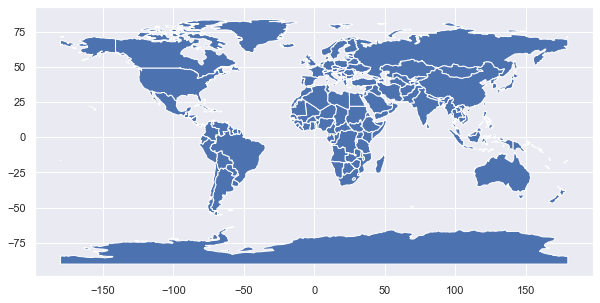

In [9]:
gdf.plot()

In [10]:
gdf.rename(columns={'ADMIN':'country', 'ADM0_A3':'code'}, inplace=True)

In [11]:
gdf.head()

,country,code,geometry
0,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,United Republic of Tanzania,TZA,POLYGON ((33.90371119710453 -0.950000000000000...
2,Western Sahara,SAH,POLYGON ((-8.665589565454809 27.65642588959236...
3,Canada,CAN,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,United States of America,USA,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


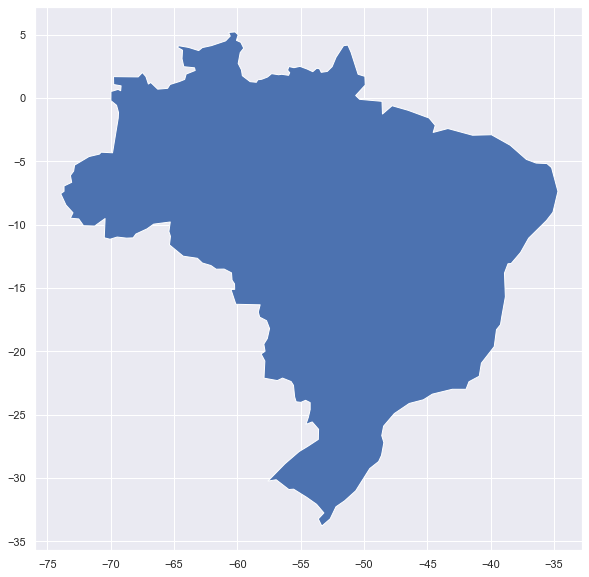

In [16]:
gdf[gdf.code=='BRA'].plot()

In [17]:
gdf[gdf.country=='Antarctica']

,country,code,geometry
159,Antarctica,ATA,(POLYGON ((-48.66061601418252 -78.047018731598...


In [18]:
gdf.loc[159]

country                                            Antarctica
code                                                      ATA
geometry    (POLYGON ((-48.66061601418252 -78.047018731598...
Name: 159, dtype: object

In [19]:
gdf.drop(159, inplace=True)

In [20]:
gdf[gdf.country=='Antarctica']

,country,code,geometry


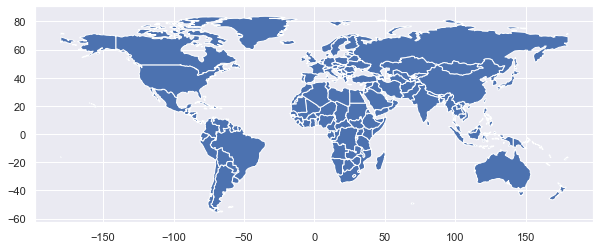

In [21]:
gdf.plot()

Ahora imporemos el csv de obesidad

In [22]:
obesity_data = 'datos/share-of-adults-defined-as-obese.csv'

In [23]:
df = pd.read_csv(obesity_data)

In [24]:
df.head()

,Entity,Code,Year,Share of adults who are obese (%)
0,Afghanistan,AFG,1975,0.5
1,Afghanistan,AFG,1976,0.5
2,Afghanistan,AFG,1977,0.6
3,Afghanistan,AFG,1978,0.6
4,Afghanistan,AFG,1979,0.6


In [25]:
df[df.Code=='MEX'].tail()

,Entity,Code,Year,Share of adults who are obese (%)
4825,Mexico,MEX,2012,26.8
4826,Mexico,MEX,2013,27.3
4827,Mexico,MEX,2014,27.8
4828,Mexico,MEX,2015,28.3
4829,Mexico,MEX,2016,28.9


Limpiar columnas

In [26]:
df.columns = ['country', 'code', 'year', 'share_adults_obese']

In [27]:
df.head()

,country,code,year,share_adults_obese
0,Afghanistan,AFG,1975,0.5
1,Afghanistan,AFG,1976,0.5
2,Afghanistan,AFG,1977,0.6
3,Afghanistan,AFG,1978,0.6
4,Afghanistan,AFG,1979,0.6


Otra forma de leer los datos y asignar el nombre de las columnas que nosotros queramos

In [ ]:
#df = pd.read_csv(obesity_data, names = ['entity', 'code', 'year', 'share_adults_obese'], skiprows = 1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 4 columns):
country               8316 non-null object
code                  7980 non-null object
year                  8316 non-null int64
share_adults_obese    8316 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 260.0+ KB


In [29]:
df[df.code.isna()]

,country,code,year,share_adults_obese
42,Africa,NaN,1975,2.0
43,Africa,NaN,1976,2.1
44,Africa,NaN,1977,2.2
45,Africa,NaN,1978,2.3
46,Africa,NaN,1979,2.3
47,Africa,NaN,1980,2.5
48,Africa,NaN,1981,2.6
49,Africa,NaN,1982,2.7
50,Africa,NaN,1983,2.8
51,Africa,NaN,1984,2.9


In [31]:
df.isna().sum()

country                 0
code                  336
year                    0
share_adults_obese      0
dtype: int64

In [32]:
df = df.dropna()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7980 entries, 0 to 8315
Data columns (total 4 columns):
country               7980 non-null object
code                  7980 non-null object
year                  7980 non-null int64
share_adults_obese    7980 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 311.7+ KB


In [34]:
df.head()

,country,code,year,share_adults_obese
0,Afghanistan,AFG,1975,0.5
1,Afghanistan,AFG,1976,0.5
2,Afghanistan,AFG,1977,0.6
3,Afghanistan,AFG,1978,0.6
4,Afghanistan,AFG,1979,0.6


In [35]:
gdf.head()

,country,code,geometry
0,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,United Republic of Tanzania,TZA,POLYGON ((33.90371119710453 -0.950000000000000...
2,Western Sahara,SAH,POLYGON ((-8.665589565454809 27.65642588959236...
3,Canada,CAN,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,United States of America,USA,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [36]:
df.drop(['country'], axis=1, inplace=True)
df.head()

,code,year,share_adults_obese
0,AFG,1975,0.5
1,AFG,1976,0.5
2,AFG,1977,0.6
3,AFG,1978,0.6
4,AFG,1979,0.6


In [37]:
gdf = gdf.merge(df)

In [38]:
gdf.head()

,country,code,geometry,year,share_adults_obese
0,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",1975,9.5
1,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",1976,9.8
2,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",1977,10.1
3,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",1978,10.5
4,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",1979,10.8


In [40]:
datos_1980 = gdf[gdf.year == 1980]
datos_1980.head()

,country,code,geometry,year,share_adults_obese
5,Fiji,FJI,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",1980,11.2
47,United Republic of Tanzania,TZA,POLYGON ((33.90371119710453 -0.950000000000000...,1980,1.2
89,Canada,CAN,"(POLYGON ((-122.84 49.00000000000011, -122.974...",1980,11.3
131,United States of America,USA,"(POLYGON ((-122.84 49.00000000000011, -120 49....",1980,13.7
173,Kazakhstan,KAZ,"POLYGON ((87.35997033076265 49.21498078062912,...",1980,7.9


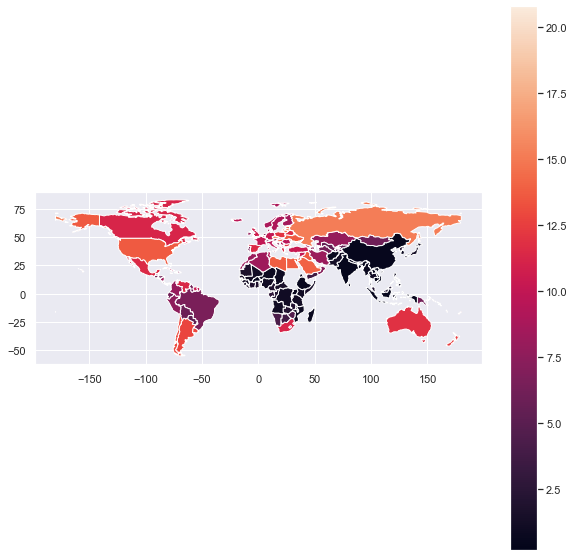

In [42]:
datos_1980.plot(column='share_adults_obese', legend=True)

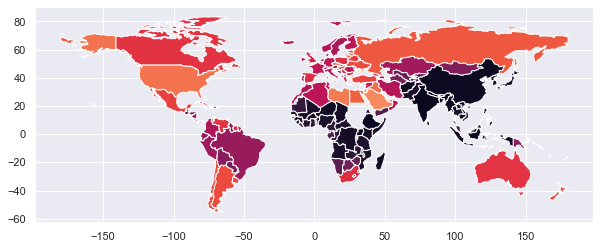

In [43]:
gdf[gdf.year == 1990].plot(column='share_adults_obese')

In [44]:
data_1980 = gdf[gdf.year == 1980]
data_1990 = gdf[gdf.year == 1990]
data_2000 = gdf[gdf.year == 2000]
data_2010 = gdf[gdf.year == 2010]

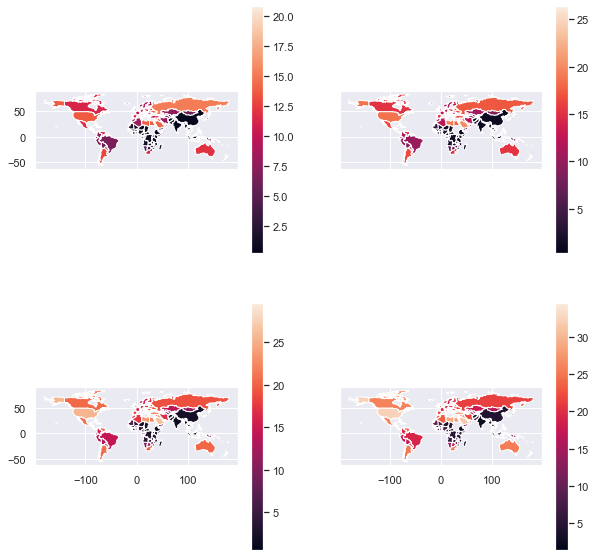

In [45]:
fig, ax = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True)
data_1980.plot(ax=ax[0][0], column='share_adults_obese', legend=True)
data_1990.plot(ax=ax[0][1], column='share_adults_obese', legend=True)
data_2000.plot(ax=ax[1][0], column='share_adults_obese', legend=True)
data_2010.plot(ax=ax[1][1], column='share_adults_obese', legend=True)

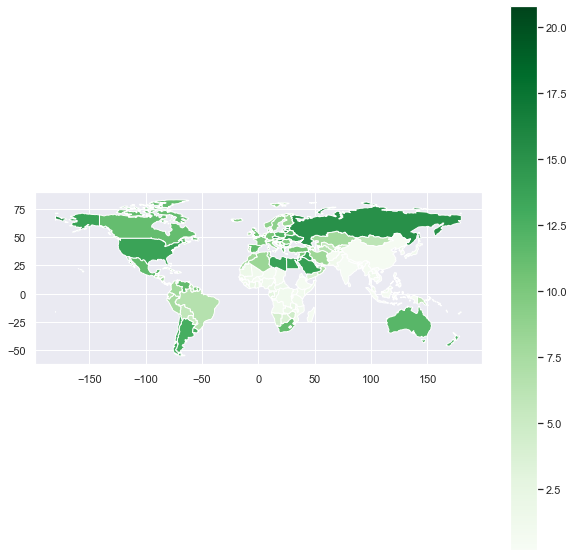

In [46]:
data_1980.plot(column='share_adults_obese', legend=True, cmap="Greens")

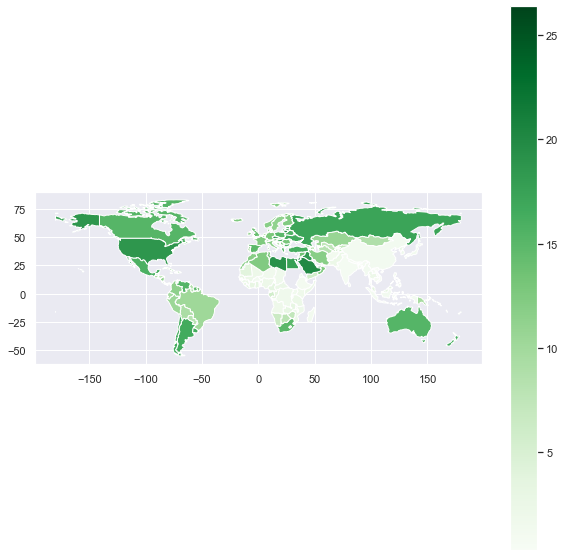

In [47]:
data_1990.plot(column='share_adults_obese', legend=True, cmap="Greens")

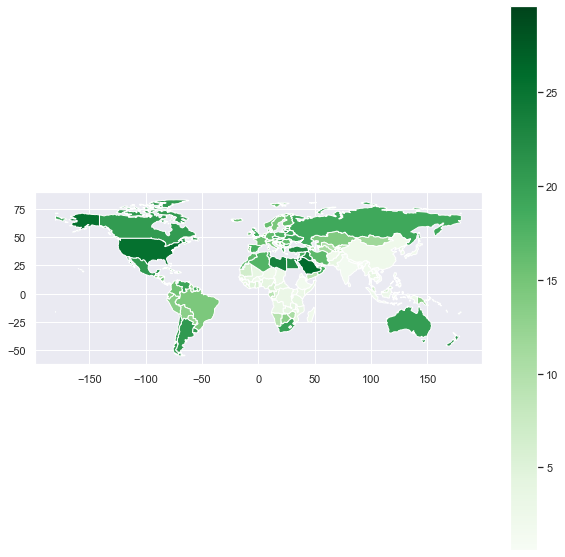

In [48]:
data_2000.plot(column='share_adults_obese', legend=True, cmap="Greens")

In [49]:
data_2000[data_2000.code == 'MEX'].head()

,country,code,geometry,year,share_adults_obese
949,Mexico,MEX,POLYGON ((-117.1277599999999 32.53533999999996...,2000,20.8


In [50]:
data_1990[data_1990.code == 'MEX'].head()

,country,code,geometry,year,share_adults_obese
939,Mexico,MEX,POLYGON ((-117.1277599999999 32.53533999999996...,1990,15.9


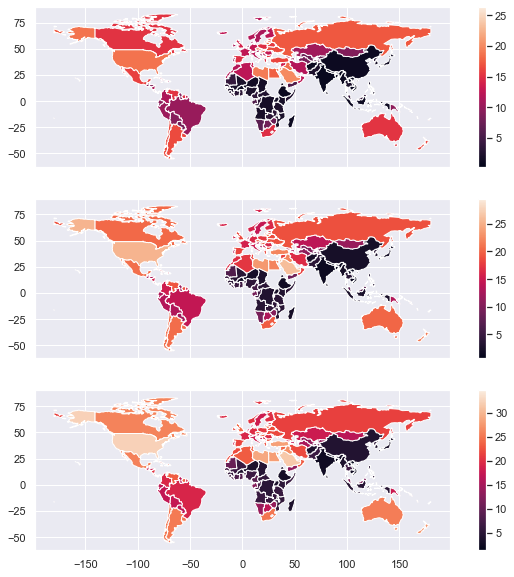

In [51]:
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
data_1990.plot(ax=ax[0], column='share_adults_obese', legend=True)
data_2000.plot(ax=ax[1], column='share_adults_obese', legend=True)
data_2010.plot(ax=ax[2], column='share_adults_obese', legend=True)

In [52]:
df[(df.code == 'MEX') & ((df.year == 2000) | (df.year == 2010)| (df.year == 1990))]

,code,year,share_adults_obese
4803,MEX,1990,15.9
4813,MEX,2000,20.8
4823,MEX,2010,25.8
